<img src="kschool.png" width="120" height="120" align="right"/>

# Content-based RecSys

<div class  = "alert alert-info">

Content-based filtering utiliza las características conocidas de los items para recomendar nuevos items que son similares (en características) a aquellos items que le gustaron al usuario en el pasado.

</div>

<div class  = "alert alert-info">

**Destacamos**:
- Es necesario conocer las características de cada item.
- Es necesario que el usuario haya mostrado o puntuado previamente algunos items.
</div>

### Ejemplo:

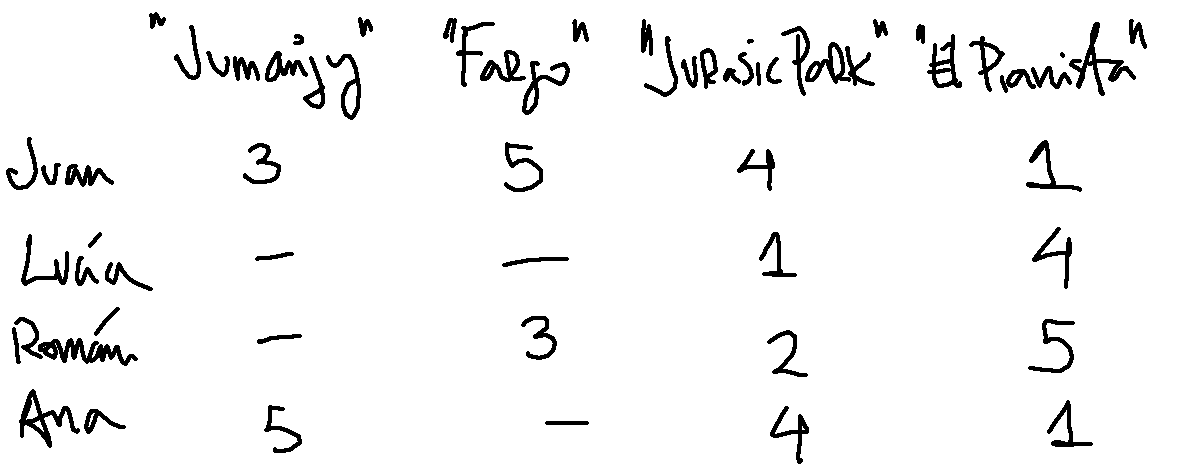

### ----------------------

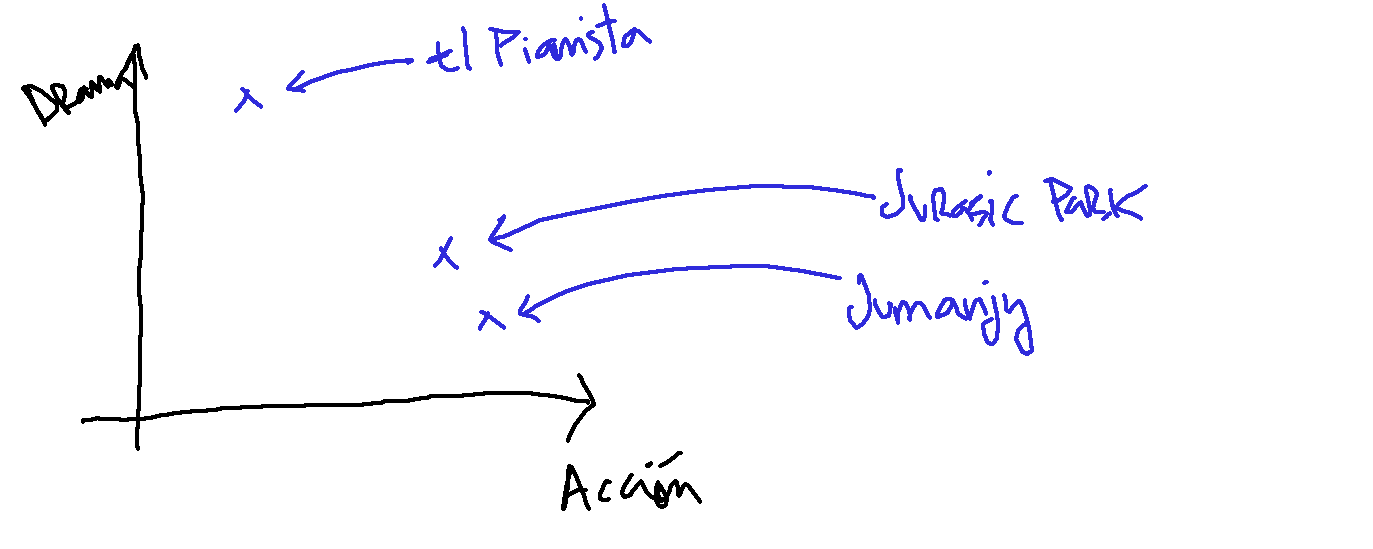

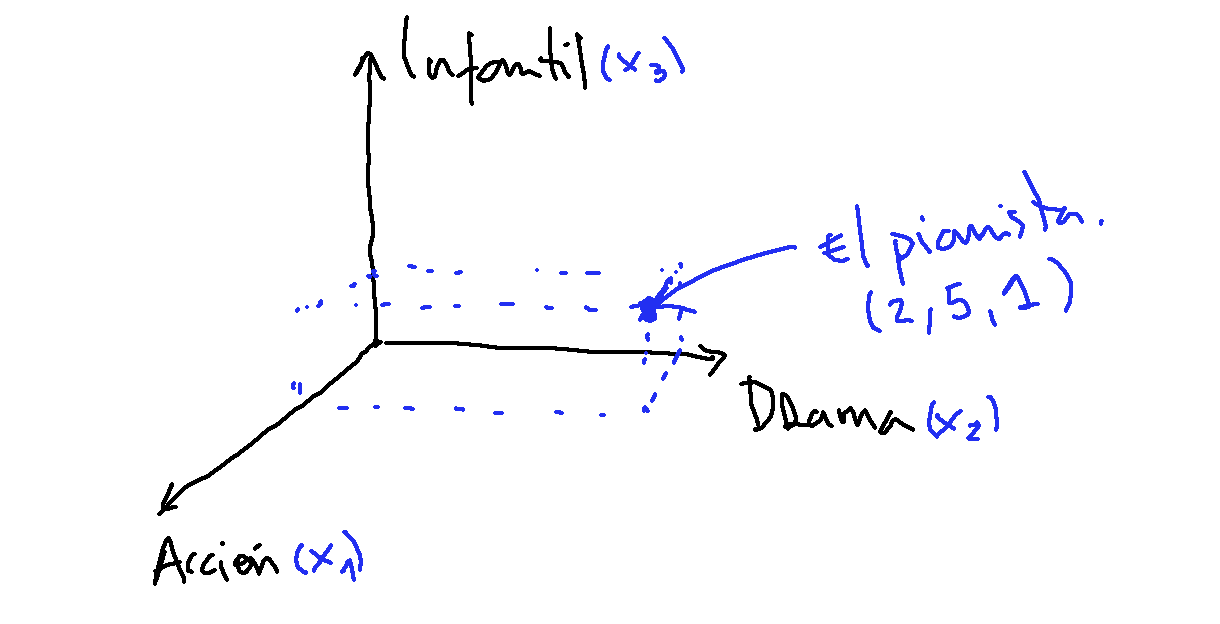

### ----------------------

### Item-feature-matrix

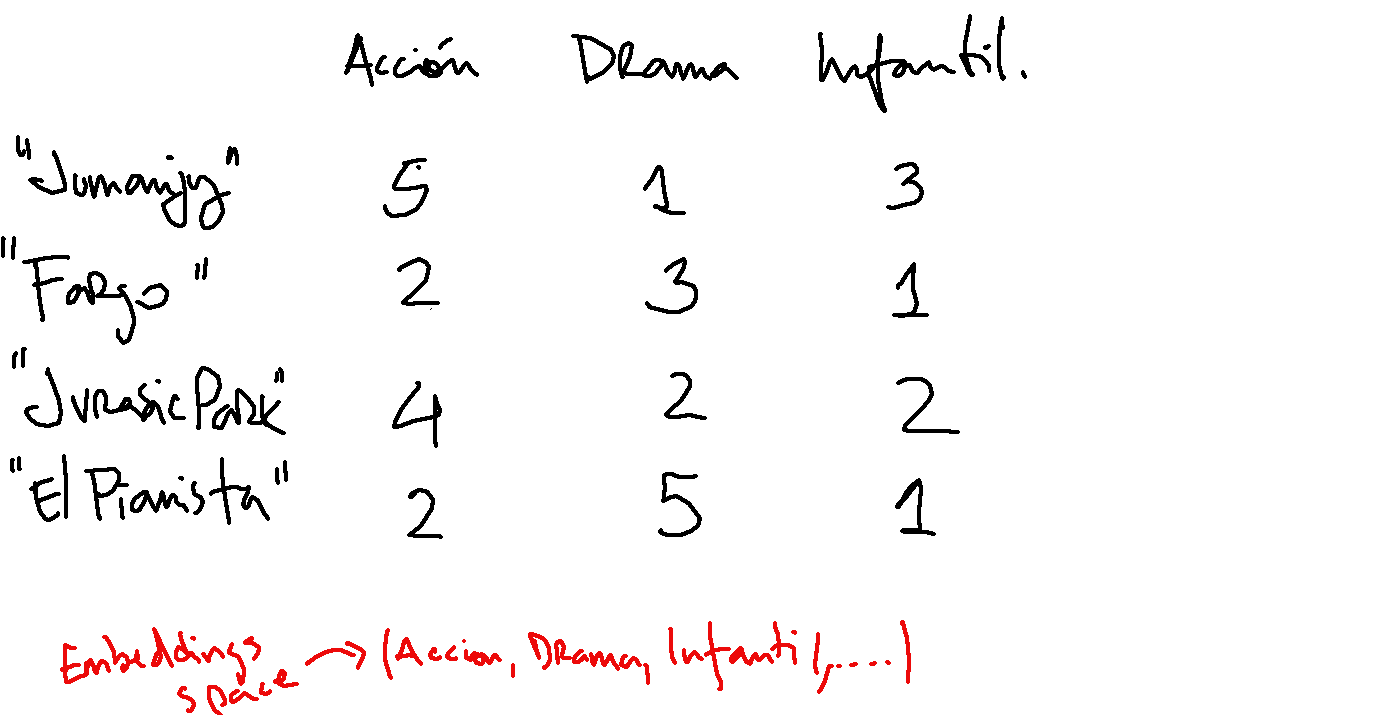

<div class  = "alert alert-warning">
    
**Importante:** 

- Es necesario conocer las características de cada item >>> categorías de las películas
- Es necesario que el usuario haya mostrado o puntuado previamente algunos items >>> likes a películas 

</div>

##### ¿Podemos encontrar películas similares?

La respuesta es sí, gracias a la posición de cada película en el embeddings space y el producto escalar.

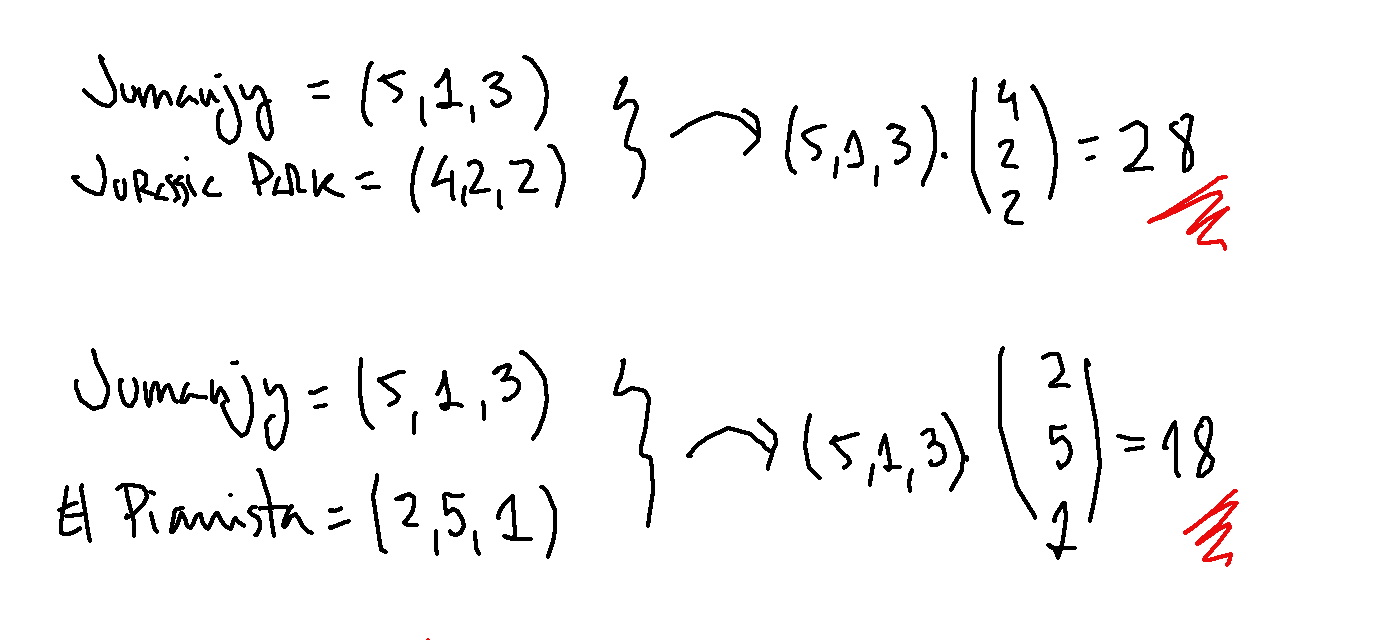

##### Coseno del ángulo entre dos vectores:

$$cos\,(\alpha)= \dfrac{\vec{u} \cdot \vec{v}}{\|\vec{u}\| \cdot \|\vec{v}\|} $$

- Cuanto más grande es el valor del coseno, más parecidas son los items
- Al estar normalizado, su valor máximo será 1. 
- En ocasiones, se habla de la distancia o similaridad del coseno como $1-cos(\alpha)$

##### ¿Podemos conocer los gustos generales de un usuario?

La respuesta es sí, mediante el **user-feature-vector**

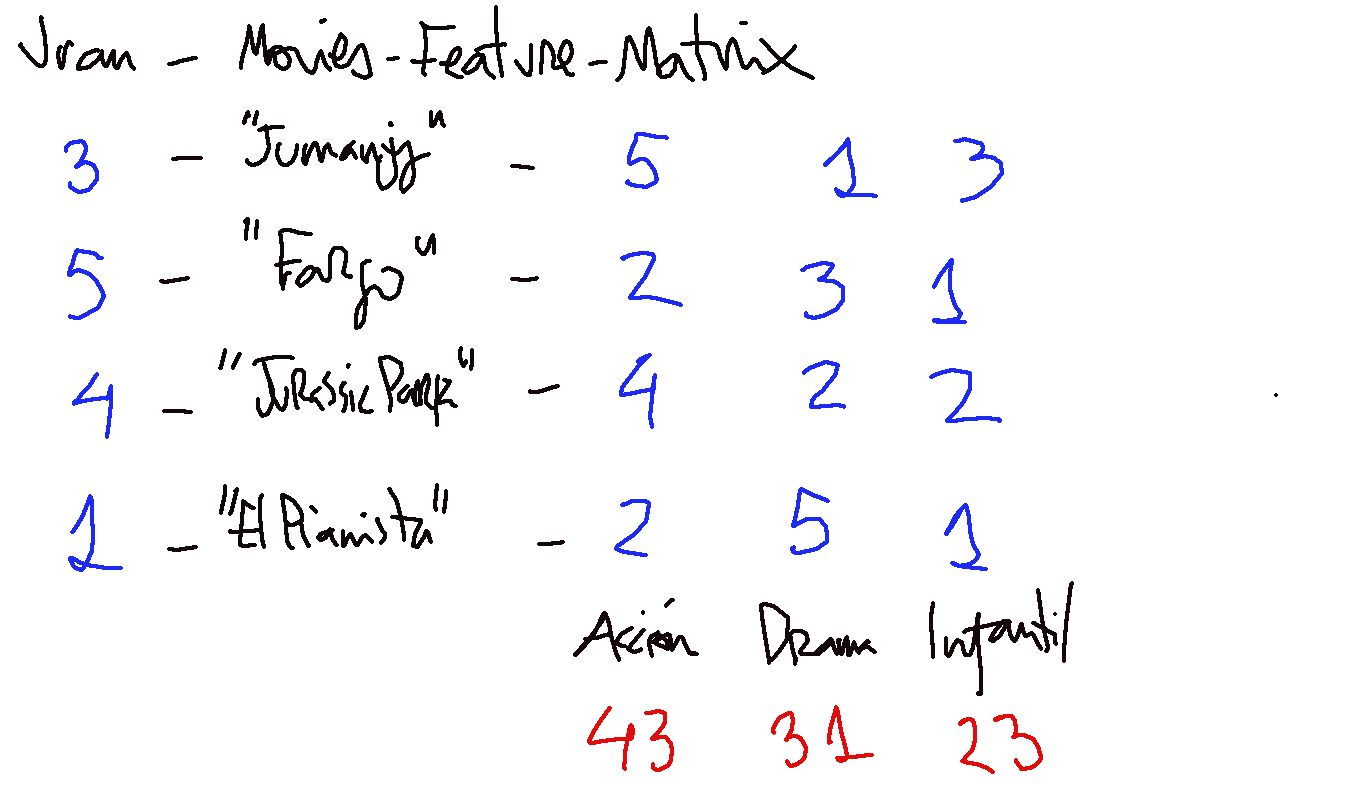

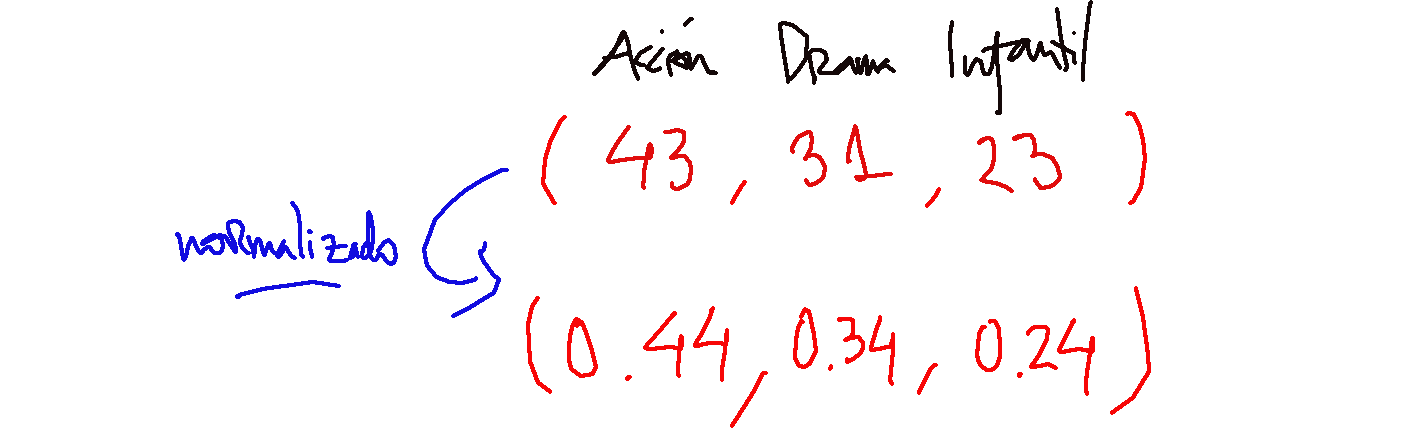

##### ¿Estamos preparados para hacer ahora recomendaciones de nuevas películas?

La respuesta es sí, gracias al **user-feature-vector** y a la **item-feature-matrix**.

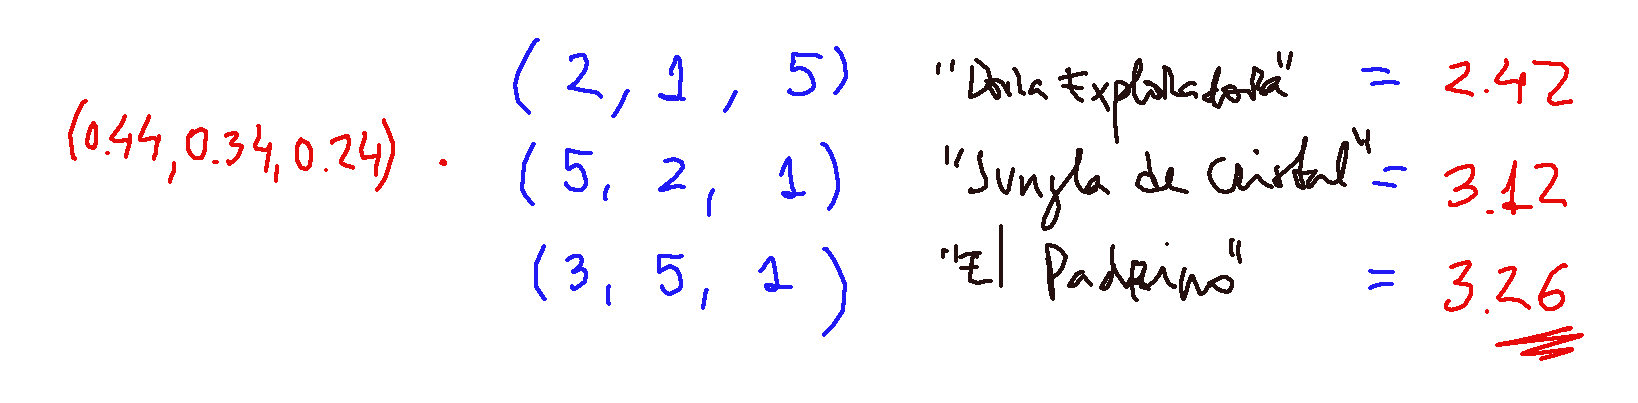

<div class  = "alert alert-warning">
    
**Desventajas**:
    
- Dependes de una buena categorización de los items previo.
- No puedes construir una buena user-feature-vector hasta que no tengas un histórico de puntuaciones (cold-start problem).
   
</div>

# Práctica

### Dataset

In [2]:
'''A lo largo del curso trabajaremos con un dataset de películas de libre uso llamado MOVIELENS.
   Lo podemos encontrar en https://grouplens.org/datasets/movielens/latest/'''

# Lo descargamos y lo guardamos en una carpeta local
folder = './data/movies'

In [8]:
'''Leemos el primero de los ficheros, que es un cnojunto de votaciones que dan los usuarios a películas'''

import pandas as pd

pd_ratings = pd.read_csv(folder+'/ratings.csv')

print('Number of rating records: ' + str(len(pd_ratings)))
print('Total of users: ' + str(pd_ratings.userId.nunique()))
pd_ratings.head()

Number of rating records: 100836
Total of users: 610


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
'''El segundo de ellos, es un fichero con el nombre de las películas y algunas características'''

pd_movies = pd.read_csv(folder+'/movies.csv')

print('Total of movies: ' + str(pd_movies.movieId.nunique()))
pd_movies.head()

Total of movies: 9742


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<div class  = "alert alert-warning">
    
**Observaciones**:

- Las características de los items, en nuestro caso, sería los géneros de las películas (los años también valdrían).
- El pasado histórico del usuario, en nuestro caso, sería la información de los votos que ha dado el usuario a películas.
   
</div>


In [40]:
'''Como este dataset lo vamos a leer en varios notebooks, vamos a definir una función de lectura'''

def read_movie_files(folder):

    pd_ratings = pd.read_csv(folder+'/ratings.csv')
    print('Number of rating records: ' + str(len(pd_ratings)))
    print('Total of users: ' + str(pd_ratings.userId.nunique()))
    
    pd_movies = pd.read_csv(folder+'/movies.csv')
    print('Total of movies: ' + str(pd_movies.movieId.nunique()))
    
    return pd_ratings, pd_movies

folder = './data/movies'
pd_ratings, pd_movies = read_movie_files(folder)

Number of rating records: 100836
Total of users: 610
Total of movies: 9742


### Item-feature-matrix

In [14]:
pd_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
import numpy as np
np.unique(n_genres)

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

In [22]:
'''Contamos el número de géneros y creamos una matriz con información numérica'''

import numpy as np

n_genres = '|'.join(pd_movies.genres)
n_genres = n_genres.split('|')

print(np.unique(n_genres))
print('Total of genres: ' + str(len(np.unique(n_genres))))

['(no genres listed)' 'Action' 'Adventure' 'Animation' 'Children' 'Comedy'
 'Crime' 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']
Total of genres: 20


In [26]:
'''Creamos una columna para cada género (feature)'''

pd_genres = pd_movies.copy(deep=True)

pd_genres['Action']      = pd_genres.genres.apply(lambda x: 1 if 'Action' in x else 0)
pd_genres['Adventure']   = pd_genres.genres.apply(lambda x: 1 if 'Adventure' in x else 0)
pd_genres['Animation']   = pd_genres.genres.apply(lambda x: 1 if 'Animation' in x else 0)
pd_genres['Children']    = pd_genres.genres.apply(lambda x: 1 if 'Children' in x else 0)
pd_genres['Comedy']      = pd_genres.genres.apply(lambda x: 1 if 'Comedy' in x else 0)
pd_genres['Crime']       = pd_genres.genres.apply(lambda x: 1 if 'Crime' in x else 0)
pd_genres['Documentary'] = pd_genres.genres.apply(lambda x: 1 if 'Documentary' in x else 0)
pd_genres['Drama']       = pd_genres.genres.apply(lambda x: 1 if 'Drama' in x else 0)
pd_genres['Fantasy']     = pd_genres.genres.apply(lambda x: 1 if 'Fantasy' in x else 0)
pd_genres['Film-Noir']   = pd_genres.genres.apply(lambda x: 1 if 'Film-Noir' in x else 0)
pd_genres['Horror']      = pd_genres.genres.apply(lambda x: 1 if 'Horror' in x else 0)
pd_genres['IMAX']        = pd_genres.genres.apply(lambda x: 1 if 'IMAX' in x else 0)
pd_genres['Musical']     = pd_genres.genres.apply(lambda x: 1 if 'Musical' in x else 0)
pd_genres['Mystery']     = pd_genres.genres.apply(lambda x: 1 if 'Mystery' in x else 0)
pd_genres['Romance']     = pd_genres.genres.apply(lambda x: 1 if 'Romance' in x else 0)
pd_genres['Sci-Fi']      = pd_genres.genres.apply(lambda x: 1 if 'Sci-Fi' in x else 0)
pd_genres['Thriller']    = pd_genres.genres.apply(lambda x: 1 if 'Thriller' in x else 0)
pd_genres['War']         = pd_genres.genres.apply(lambda x: 1 if 'War' in x else 0)
pd_genres['Western']     = pd_genres.genres.apply(lambda x: 1 if 'Western' in x else 0)

pd_genres = pd_genres.drop('genres', axis=1)
pd_genres.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Item-similarities:

- Hemos conseguido un vector de features asociado a cada pelicula.
- Por tanto, podemos localizar peliculas similares:

    - Distancia euclidea
    - Distancia del coseno

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
# Calculamos el vector asociado para cada película:

vector_features = pd_genres[['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

vector_features['features'] = vector_features.apply(lambda x: np.array(x), axis=1)

pd_genres_vec = pd_genres[['movieId','title']]
pd_genres_vec['features'] = vector_features['features']
pd_genres_vec

,movieId,title,features
0,1,Toy Story (1995),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Jumanji (1995),"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,Grumpier Old Men (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,4,Waiting to Exhale (1995),"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."
4,5,Father of the Bride Part II (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
9738,193583,No Game No Life: Zero (2017),"[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
9739,193585,Flint (2017),"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Cálculo de la distancia del coseno

In [45]:
# Por ejemplo, vamos a tomar una película

i = 0 
item = pd_genres_vec.title[i]
print('Peliculas similares a: ' + str(item))

# Por la distancia euclidea: 
x = pd_genres_vec.features[i]

pd_genres_vec['euclidean_dist'] = pd_genres_vec.features.apply(lambda y: np.sqrt(np.dot(x, x) - 2 * np.dot(x, y) + np.dot(y, y)))

# Por la distancia del coseno:
pd_genres_vec['cosine_dist'] = pd_genres_vec.features.apply(lambda y: np.dot(x, y) / (np.sqrt(np.dot(x,x)) * np.sqrt(np.dot(y,y))))

pd_genres_vec.head()

Peliculas similares a: Toy Story (1995)


,movieId,title,features,euclidean_dist,cosine_dist
0,1,Toy Story (1995),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.000000,1.000000
1,2,Jumanji (1995),"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1.414214,0.774597
2,3,Grumpier Old Men (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",2.236068,0.316228
3,4,Waiting to Exhale (1995),"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...",2.449490,0.258199
4,5,Father of the Bride Part II (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.000000,0.447214


In [9]:
# Por ejemplo, sacaremos los 5 más parecidos

pd_genres_vec.sort_values('euclidean_dist', ascending=True).head(5)

,movieId,title,features,euclidean_dist,cosine_dist
0,1,Toy Story (1995),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
8927,136016,The Good Dinosaur (2015),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
8219,103755,Turbo (2013),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
7760,91355,Asterix and the Vikings (Astérix et les Viking...,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
6948,65577,"Tale of Despereaux, The (2008)","[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.0,1.0


##### User-Feature vectors

In [60]:
# Por ejemplo, vamos a tomar un usuario y listamos todas las películas que ha visto con su puntuacion

j = 13
pd_user_ratings = pd_ratings[pd_ratings.userId == j]
pd_user_ratings

,userId,movieId,rating,timestamp
1355,13,47,5.0,987895819
1356,13,305,1.0,987456968
1357,13,597,3.0,987456968
1358,13,1173,3.0,987457052
1359,13,1198,5.0,987456848
1360,13,1590,4.0,987457086
1361,13,1619,3.0,987895819
1362,13,1639,4.0,987456818
1363,13,1721,4.0,987456818
1364,13,2145,3.0,987456968


In [61]:
# Ahora vamos a multiplicar la puntuacion por cada genero

pd_user_ratings_2 = pd.merge(pd_user_ratings, pd_genres, on='movieId', how='left')
pd_user_ratings_2 = pd_user_ratings_2.drop(['userId', 'movieId', 'timestamp', 'title'], axis=1)
pd_user_ratings_2 = pd_user_ratings_2.multiply(pd_user_ratings_2["rating"], axis="index")
pd_user_ratings_2 = pd_user_ratings_2.drop('rating', axis=1)
pd_user_ratings_2

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
6,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
7,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [59]:
# user-feature vector

pd_user_ratings_2.sum() / len(pd_user_ratings_2)

Action         1.676724
Adventure      1.607759
Animation      0.586207
Children       0.823276
Comedy         1.530172
Crime          0.844828
Documentary    0.000000
Drama          1.327586
Fantasy        0.870690
Film-Noir      0.021552
Horror         0.254310
IMAX           0.000000
Musical        0.443966
Mystery        0.323276
Romance        0.482759
Sci-Fi         0.728448
Thriller       0.982759
War            0.426724
Western        0.129310
dtype: float64

<div class  = "alert alert-info">
    
**Recordatorio**:

- A cada vector de películas (features) le tenemos que multiplicar el user-feature vector para saber cuánto le va a gustar
- Y le vamos a recomendar aquellas que le gusten, pero que no haya visto/votado aún

</div>

### Recomendaciones

Vamos a partir del principio y vamos a crear las matrices clave para el cálculo de recomendaciones para un usuario

In [63]:
# user-item matrix

pd_user_item = pd.merge(pd_ratings,pd_genres, on='movieId', how='left')
pd_user_item.head()

,userId,movieId,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,Grumpier Old Men (1995),0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,Heat (1995),1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [64]:
pd_user_item['Action']      = pd_user_item.apply(lambda x: x.rating * x.Action, axis=1)
pd_user_item['Adventure']   = pd_user_item.apply(lambda x: x.rating * x.Adventure, axis=1)
pd_user_item['Animation']   = pd_user_item.apply(lambda x: x.rating * x.Animation, axis=1)
pd_user_item['Children']    = pd_user_item.apply(lambda x: x.rating * x.Children, axis=1)
pd_user_item['Comedy']      = pd_user_item.apply(lambda x: x.rating * x.Comedy, axis=1)
pd_user_item['Crime']       = pd_user_item.apply(lambda x: x.rating * x.Crime, axis=1)
pd_user_item['Documentary'] = pd_user_item.apply(lambda x: x.rating * x.Documentary, axis=1)
pd_user_item['Drama']       = pd_user_item.apply(lambda x: x.rating * x.Drama, axis=1)
pd_user_item['Fantasy']     = pd_user_item.apply(lambda x: x.rating * x.Fantasy, axis=1)
pd_user_item['Film-Noir']   = pd_user_item.apply(lambda x: x.rating * x['Film-Noir'], axis=1)
pd_user_item['Horror']      = pd_user_item.apply(lambda x: x.rating * x.Horror, axis=1)
pd_user_item['IMAX']        = pd_user_item.apply(lambda x: x.rating * x.IMAX, axis=1)
pd_user_item['Musical']     = pd_user_item.apply(lambda x: x.rating * x.Musical, axis=1)
pd_user_item['Mystery']     = pd_user_item.apply(lambda x: x.rating * x.Mystery, axis=1)
pd_user_item['Romance']     = pd_user_item.apply(lambda x: x.rating * x.Romance, axis=1)
pd_user_item['Sci-Fi']      = pd_user_item.apply(lambda x: x.rating * x['Sci-Fi'], axis=1)
pd_user_item['Thriller']    = pd_user_item.apply(lambda x: x.rating * x.Thriller, axis=1)
pd_user_item['War']         = pd_user_item.apply(lambda x: x.rating * x.War, axis=1)
pd_user_item['Western']     = pd_user_item.apply(lambda x: x.rating * x.Western, axis=1)

pd_user_item = pd_user_item.drop(['movieId', 'timestamp', 'title', 'rating'], axis=1)
pd_user_item

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2,1,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
100832,610,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
100833,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100834,610,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [65]:
pd_user_feature_vec = pd_user_item.groupby('userId').sum() / pd_user_item.groupby('userId').count()  
pd_user_feature_vec = pd_user_feature_vec.reset_index()
pd_user_feature_vec

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1.676724,1.607759,0.586207,0.823276,1.530172,0.844828,0.000000,1.327586,0.870690,0.021552,0.254310,0.000000,0.443966,0.323276,0.482759,0.728448,0.982759,0.426724,0.129310
1,2,1.500000,0.431034,0.000000,0.000000,0.965517,1.310345,0.448276,2.275862,0.000000,0.000000,0.103448,0.517241,0.000000,0.275862,0.155172,0.534483,1.275862,0.155172,0.120690
2,3,1.282051,0.769231,0.051282,0.064103,0.230769,0.025641,0.000000,0.307692,0.346154,0.000000,0.961538,0.000000,0.012821,0.128205,0.064103,1.615385,0.743590,0.064103,0.000000
3,4,0.384259,0.490741,0.111111,0.175926,1.689815,0.476852,0.037037,1.935185,0.324074,0.074074,0.078704,0.013889,0.296296,0.370370,0.907407,0.157407,0.625000,0.115741,0.175926
4,5,0.636364,0.590909,0.590909,0.840909,1.181818,1.045455,0.000000,2.159091,0.659091,0.000000,0.068182,0.250000,0.500000,0.090909,0.772727,0.113636,0.727273,0.227273,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.430493,0.461883,0.139910,0.151570,1.346188,0.435874,0.017040,2.371300,0.313004,0.027354,0.156054,0.043946,0.147085,0.309417,1.191031,0.252018,0.629148,0.221076,0.052018
606,607,1.433155,0.834225,0.106952,0.347594,0.978610,0.550802,0.000000,1.759358,0.401070,0.000000,0.770053,0.026738,0.096257,0.422460,0.545455,0.625668,1.342246,0.133690,0.042781
607,608,1.110108,0.701564,0.206378,0.260529,1.169073,0.634777,0.021661,1.158243,0.400722,0.018051,0.387485,0.057762,0.109507,0.294826,0.368231,0.662455,1.102286,0.081829,0.034898
608,609,0.918919,0.864865,0.081081,0.162162,0.621622,0.567568,0.162162,1.729730,0.081081,0.000000,0.189189,0.081081,0.000000,0.000000,0.432432,0.405405,1.243243,0.378378,0.108108


In [71]:
vector_features = pd_user_feature_vec[['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].to_numpy()

pd_user_feature_vec['feature'] = [row for row in vector_features]
pd_user_feature = pd_user_feature_vec[['userId', 'feature']]
pd_user_feature

,userId,feature
0,1,"[1.6767241379310345, 1.6077586206896552, 0.586..."
1,2,"[1.5, 0.43103448275862066, 0.0, 0.0, 0.9655172..."
2,3,"[1.2820512820512822, 0.7692307692307693, 0.051..."
3,4,"[0.38425925925925924, 0.49074074074074076, 0.1..."
4,5,"[0.6363636363636364, 0.5909090909090909, 0.590..."
...,...,...
605,606,"[0.4304932735426009, 0.4618834080717489, 0.139..."
606,607,"[1.4331550802139037, 0.8342245989304813, 0.106..."
607,608,"[1.1101083032490975, 0.7015643802647413, 0.206..."
608,609,"[0.918918918918919, 0.8648648648648649, 0.0810..."


In [72]:
vector_features = pd_genres[['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].to_numpy()

pd_item_feature = pd_genres[['movieId', 'title']]
pd_item_feature['features'] = [row for row in vector_features]
pd_item_feature.head()

,movieId,title,features
0,1,Toy Story (1995),"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Jumanji (1995),"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,Grumpier Old Men (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,4,Waiting to Exhale (1995),"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."
4,5,Father of the Bride Part II (1995),"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [79]:
userId = 5

v = pd_user_feature.feature[i]
print(v)
pd_userId = pd_item_feature.copy(deep=True)
pd_userId['cosine'] = pd_userId.features.apply(lambda x: np.dot(x,v) / (np.sqrt(np.dot(x,x)) * np.sqrt(np.dot(v,v))))
pd_userId.sort_values('cosine', ascending=False)

[1.67672414 1.60775862 0.5862069  0.82327586 1.53017241 0.84482759
 0.         1.32758621 0.87068966 0.02155172 0.25431034 0.
 0.44396552 0.32327586 0.48275862 0.72844828 0.98275862 0.42672414
 0.12931034]


,movieId,title,features,cosine
8597,117646,Dragonheart 2: A New Beginning (2000),"[1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",0.863548
6570,55116,"Hunting Party, The (2007)","[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.842958
4005,5657,Flashback (1990),"[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.826640
4681,6990,The Great Train Robbery (1978),"[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.826640
3608,4956,"Stunt Man, The (1980)","[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...",0.821651
...,...,...,...,...
9573,174403,The Putin Interviews (2017),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN
9611,176601,Black Mirror,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN
9661,181413,Too Funny to Fail: The Life and Death of The D...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN
9663,181719,Serving in Silence: The Margarethe Cammermeyer...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN


In [81]:
# Ejemplo:

userId = 5

v = pd_user_feature.feature[i]
pd_userId = pd_item_feature.copy(deep=True)
pd_userId['dot_product'] = pd_userId.features.apply(lambda x: np.dot(x,v))

# De las pelis que ha visto:
pd_userId_mostliked = pd.merge(pd_userId, pd_user_ratings, on='movieId', how='right')
pd_userId_mostliked[['movieId','title','dot_product']].sort_values('dot_product', ascending=False)

,movieId,title,dot_product
22,3827,Space Cowboys (2000),5.543103
24,3893,Nurse Betty (2000),5.168103
17,3624,Shanghai Noon (2000),4.943966
16,3578,Gladiator (2000),4.612069
20,3793,X-Men (2000),4.012931
28,3996,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",3.487069
19,3753,"Patriot, The (2000)",3.431034
12,2571,"Matrix, The (1999)",3.387931
6,1619,Seven Years in Tibet (1997),3.362069
29,4011,Snatch (2000),3.357759


In [82]:
# De las pelis que NO ha visto aun:

pd_userId_recommeded = pd.merge(pd_userId, pd_user_ratings, on='movieId', how='left')
pd_userId_recommeded = pd_userId_recommeded[pd_userId_recommeded.userId.isna()]
pd_userId_recommeded[['movieId','title','dot_product']].sort_values('dot_product', ascending=False)

,movieId,title,dot_product
7441,81132,Rubber (2010),8.698276
8597,117646,Dragonheart 2: A New Beginning (2000),7.995690
7170,71999,Aelita: The Queen of Mars (Aelita) (1924),7.676724
3608,4956,"Stunt Man, The (1980)",7.607759
3460,4719,Osmosis Jones (2001),7.431034
...,...,...,...
892,1189,"Thin Blue Line, The (1988)",0.000000
9424,165969,HyperNormalisation (2016),0.000000
4642,6938,Billabong Odyssey (2003),0.000000
6783,60333,Encounters at the End of the World (2008),0.000000


# Ejercicio

<div class  = "alert alert-success">

Tenemos un periódico con las siguientes noticias que han puntuado los usuarios: 

https://www.kaggle.com/gspmoreira/articles-sharing-reading-from-cit-deskdrop/data

Tras ello, trataremos de hacer un análisis de cuáles son las noticias que podemos recomendar a que lean nuestros lectores.

</div>

##### Dataset

In [58]:
folder = './data/articles'

In [59]:
pd_shared_articles = pd.read_csv(folder+'/shared_articles.csv')
pd_shared_articles = pd_shared_articles[['title','text','contentId']].drop_duplicates().reset_index(drop=True)
print(len(pd_shared_articles))
pd_shared_articles.head()

3060


,title,text,contentId
0,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,-6451309518266745024
1,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,-4110354420726924665
2,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,-7292285110016212249
3,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,-6151852268067518688
4,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,2448026894306402386


In [61]:
pd_users_interactions = pd.read_csv(folder+'/users_interactions.csv')
pd_users_interactions = pd_users_interactions[['eventType','personId','contentId']]
print(len(pd_users_interactions))
pd_users_interactions.head()

72312


,eventType,personId,contentId
0,VIEW,-8845298781299428018,-3499919498720038879
1,VIEW,-1032019229384696495,8890720798209849691
2,VIEW,-1130272294246983140,310515487419366995
3,FOLLOW,344280948527967603,310515487419366995
4,VIEW,-445337111692715325,-7820640624231356730


In [62]:
pd_users_interactions['points'] = 0
pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 1 if x.eventType=='VIEW' else x.points, axis=1)
pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 2 if x.eventType=='BOOKMARK' else x.points, axis=1)
pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 3 if x.eventType=='LIKE' else x.points, axis=1)
pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 4 if x.eventType=='FOLLOW' else x.points, axis=1)
pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 5 if x.eventType=='COMMENT CREATED' else x.points, axis=1)
pd_users_interactions.head()

,eventType,personId,contentId,points
0,VIEW,-8845298781299428018,-3499919498720038879,1
1,VIEW,-1032019229384696495,8890720798209849691,1
2,VIEW,-1130272294246983140,310515487419366995,1
3,FOLLOW,344280948527967603,310515487419366995,4
4,VIEW,-445337111692715325,-7820640624231356730,1


In [63]:
pd_users_interactions = pd_users_interactions.drop('eventType', axis=1)
pd_users_interactions = pd_users_interactions.groupby(['personId','contentId']).count().reset_index()
print(len(pd_users_interactions))
pd_users_interactions.head()

40710


,personId,contentId,points
0,-9223121837663643404,-8949113594875411859,1
1,-9223121837663643404,-8377626164558006982,1
2,-9223121837663643404,-8208801367848627943,1
3,-9223121837663643404,-8187220755213888616,1
4,-9223121837663643404,-7423191370472335463,8


In [64]:
pd_data = pd.merge(pd_users_interactions, pd_shared_articles, on='contentId', how='left')
pd_data.head()

,personId,contentId,points,title,text
0,-9223121837663643404,-8949113594875411859,1,"No Brasil, '25% dos celulares ainda são 'Burro...","Divulgação O ex-jogador de futebol Tostão, don..."
1,-9223121837663643404,-8377626164558006982,1,Bad Writing Is Destroying Your Company's Produ...,A hidden source of friction is slowing your co...
2,-9223121837663643404,-8208801367848627943,1,Ray Kurzweil: The world isn't getting worse - ...,"Ray Kurzweil, the author, inventor, computer s..."
3,-9223121837663643404,-8187220755213888616,1,Organizing for digital acceleration: Making a ...,By adopting a digital product management model...
4,-9223121837663643404,-7423191370472335463,8,"Espresso Intents: não é magia, é tecnologia! -...",Se você leu meu último artigo sobre Testes uni...


In [65]:
'''Creamos una función para cargar estos datos'''

def read_article_files(folder):
    
    pd_shared_articles = pd.read_csv(folder+'/shared_articles.csv')
    pd_shared_articles = pd_shared_articles[['title','text','contentId']].drop_duplicates().reset_index(drop=True)
    print('Number of articles: ' + str(len(pd_shared_articles)))
    
    pd_users_interactions = pd.read_csv(folder+'/users_interactions.csv')
    pd_users_interactions = pd_users_interactions[['eventType','personId','contentId']]
    
    pd_users_interactions['points'] = 0
    pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 1 if x.eventType=='VIEW' else x.points, axis=1)
    pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 2 if x.eventType=='BOOKMARK' else x.points, axis=1)
    pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 3 if x.eventType=='LIKE' else x.points, axis=1)
    pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 4 if x.eventType=='FOLLOW' else x.points, axis=1)
    pd_users_interactions['points'] = pd_users_interactions.apply(lambda x: 5 if x.eventType=='COMMENT CREATED' else x.points, axis=1)
    
    pd_users_interactions = pd_users_interactions.drop('eventType', axis=1)
    pd_users_interactions = pd_users_interactions.groupby(['personId','contentId']).count().reset_index()
    print('Number of user interactions: ' + str(len(pd_users_interactions)))
    
    return pd.merge(pd_users_interactions, pd_shared_articles, on='contentId', how='left')

    
folder = './data/articles'
pd_data = read_article_files(folder)

Number of articles: 3060
Number of user interactions: 40710


##### Buscamos palabras importantes para dimensionar nuestros embeddings

In [66]:
texto = pd_data.title.tolist()
texto = '-'.join(texto)
texto

'No Brasil, \'25% dos celulares ainda são \'Burrofones\'-Bad Writing Is Destroying Your Company\'s Productivity-Ray Kurzweil: The world isn\'t getting worse - our information is getting better-Organizing for digital acceleration: Making a two-speed IT operating model work-Espresso Intents: não é magia, é tecnologia! - Android Dev BR-Here\'s proof that Google is getting serious about battling Facebook in a key area-My experience with Google\'s Associate Android Developer Certification-Seniority-Listas com RecyclerView - Android Dev BR-Google\'s fair use victory is good for open source-Why Silicon Valley is all wrong about Apple\'s AirPods - Chris Messina-5 awesome Google Keep features you aren\'t using, but should be-Inbox by Gmail: a better way to keep track of events, newsletters and links-Changing change management-Exclusive: Why Microsoft is betting its future on AI-Governo brasileiro cria manual para contratação de cloud-Google launches Springboard, an AI-powered assistant for its 

In [67]:
# !pip install stop-words
from stop_words import get_stop_words

from nltk.tokenize import word_tokenize 
from nltk import FreqDist

import re

texto = texto.lower()
texto = re.sub('[^a-zA-Z ]', '', texto)
texto_tokens = word_tokenize(texto)

stop_words = get_stop_words('english')
texto_filtrado = [w for w in texto_tokens if not w in stop_words]
stop_words = get_stop_words('spanish')
texto_filtrado = [w for w in texto_filtrado if not w in stop_words]
stop_words = get_stop_words('portuguese')
texto_filtrado = [w for w in texto_filtrado if not w in stop_words]

print(len(texto_filtrado))
# texto_filtrado

word_freq = FreqDist(texto_filtrado)
word_freq

220113


FreqDist({'google': 3334, 'new': 1308, 'cloud': 1212, 'android': 1161, 'learning': 1150, 'code': 907, 'digital': 893, 'app': 772, 'now': 702, 'design': 689, ...})

In [68]:
pd_relevant_words = pd.DataFrame.from_dict(word_freq, orient='index', columns=['freq']).sort_values('freq', ascending=False)
pd_relevant_words = pd_relevant_words.iloc[0:100,:]
relevant_words = list(pd_relevant_words.index)
relevant_words

['google',
 'new',
 'cloud',
 'android',
 'learning',
 'code',
 'digital',
 'app',
 'now',
 'design',
 'voc',
 'lana',
 'machine',
 'data',
 'vs',
 'artificial',
 'will',
 'ai',
 'internet',
 'best',
 'open',
 'web',
 'apps',
 'software',
 'future',
 'developers',
 'learn',
 'mobile',
 'apple',
 'visual',
 'time',
 'facebook',
 'brasil',
 'bank',
 'platform',
 'tecnologia',
 'drupal',
 'part',
 'javascript',
 'est',
 'world',
 'api',
 'plataforma',
 'career',
 'blockchain',
 'using',
 'can',
 'iot',
 'getting',
 'business',
 'big',
 'first',
 'next',
 'coach',
 'r',
 'java',
 'docker',
 'know',
 'vai',
 'tempo',
 'things',
 'one',
 'real',
 'intelligence',
 'programming',
 'better',
 'trick',
 'just',
 'us',
 'shares',
 'nova',
 'use',
 'linux',
 'empresas',
 'figuring',
 'apis',
 'free',
 'googles',
 'build',
 'trends',
 'chatbots',
 'tech',
 'ecommerce',
 'guide',
 'source',
 'developer',
 'git',
 'amazon',
 'bitcoin',
 'netflix',
 'way',
 'ios',
 'anuncia',
 'performance',
 'testing

In [69]:
pd_data2 = pd_data.copy()

pd_data2['title2'] = pd_data2.title.apply(lambda x: str(x).lower())
pd_data2['title2'] = pd_data2.title2.apply(lambda x: re.sub('[^a-zA-Z ]', '', x))
pd_data2 = pd_data2.drop(['title','text'], axis=1)
pd_data2.head(5)

,personId,contentId,points,title2
0,-9223121837663643404,-8949113594875411859,1,no brasil dos celulares ainda so burrofones
1,-9223121837663643404,-8377626164558006982,1,bad writing is destroying your companys produc...
2,-9223121837663643404,-8208801367848627943,1,ray kurzweil the world isnt getting worse our...
3,-9223121837663643404,-8187220755213888616,1,organizing for digital acceleration making a t...
4,-9223121837663643404,-7423191370472335463,8,espresso intents no magia tecnologia androi...


##### Creamos item-feature-vector

In [70]:
item_feature = pd_data2.copy()

for i in range(len(relevant_words)):
    word = relevant_words[i]
    item_feature[word] = 0
    item_feature[word] = item_feature.apply(lambda x: 1 if (word in x.title2) else 0, axis=1)

item_feature = item_feature.drop(['points','title2', 'personId'], axis=1)
item_feature = item_feature.drop_duplicates()
print(len(item_feature))
item_feature.head(5)

2988


,contentId,google,new,cloud,android,learning,code,digital,app,now,...,way,ios,anuncia,performance,testing,built,users,famlia,make,github
0,-8949113594875411859,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-8377626164558006982,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-8208801367848627943,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-8187220755213888616,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-7423191370472335463,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
vector_features = item_feature.drop(['contentId'], axis=1).to_numpy()

item_feature['feature'] = [row for row in vector_features]
item_feature = item_feature[['contentId', 'feature']]
print(len(item_feature))
item_feature.head(5)

2988


,contentId,feature
0,-8949113594875411859,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,-8377626164558006982,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,-8208801367848627943,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,-8187220755213888616,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,-7423191370472335463,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


##### Creamos el user-feature vector

In [72]:
user_feature = pd_data2.copy()

for i in range(len(relevant_words)):
    word = relevant_words[i]
    user_feature[word] = 0
    user_feature[word] = user_feature.apply(lambda x: x.points if (word in x.title2) else 0, axis=1)

user_feature = user_feature.drop(['points','title2', 'contentId'], axis=1)
user_feature = user_feature.drop_duplicates()
user_feature.head(5)

,personId,google,new,cloud,android,learning,code,digital,app,now,...,way,ios,anuncia,performance,testing,built,users,famlia,make,github
0,-9223121837663643404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-9223121837663643404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-9223121837663643404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-9223121837663643404,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-9223121837663643404,0,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
user_feature = user_feature.groupby(['personId']).sum().reset_index()
user_feature.head(5)

,personId,google,new,cloud,android,learning,code,digital,app,now,...,way,ios,anuncia,performance,testing,built,users,famlia,make,github
0,-9223121837663643404,14,3,3,15,0,4,2,8,0,...,1,0,0,0,0,0,0,0,3,0
1,-9212075797126931087,2,0,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-9207251133131336884,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-9199575329909162940,0,1,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-9196668942822132778,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# user-feature

vector_features = user_feature.drop(['personId'], axis=1).to_numpy()

user_feature['feature'] = [row for row in vector_features]
user_feature = user_feature[['personId', 'feature']]
user_feature.head(5)

,personId,feature
0,-9223121837663643404,"[14, 3, 3, 15, 0, 4, 2, 8, 0, 0, 0, 0, 0, 0, 0..."
1,-9212075797126931087,"[2, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,-9207251133131336884,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,-9199575329909162940,"[0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,-9196668942822132778,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ..."


In [75]:
# normalizado

user_feature['feature'] = user_feature.feature.apply(lambda x: x / sum(x))
user_feature.head(5)

,personId,feature
0,-9223121837663643404,"[0.06763285024154589, 0.014492753623188406, 0...."
1,-9212075797126931087,"[0.08, 0.0, 0.08, 0.16, 0.0, 0.0, 0.0, 0.0, 0...."
2,-9207251133131336884,"[0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,-9199575329909162940,"[0.0, 0.038461538461538464, 0.0, 0.0, 0.0, 0.0..."
4,-9196668942822132778,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04545454..."


##### hacemos recomendaciones para un usuario

In [76]:
user = -9207251133131336884

user_vector = user_feature[user_feature.personId == user]['feature'].reset_index(drop=True)[0]

recomendations_score = item_feature.copy()
recomendations_score['score'] = recomendations_score.feature.apply(lambda x: x.dot(user_vector))
recomendations_score = recomendations_score.sort_values(by='score', ascending=False)
recomendations_score.head(5)

,contentId,feature,score
51,-4029704725707465084,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.733333
19485,6984066580750577207,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.488889
711,-33740349536513960,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.466667
9,-6558712014192834002,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.466667
1133,8482750322470893687,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.466667


In [77]:
pd.merge(recomendations_score, pd_data2[['contentId','title2']].drop_duplicates(), on='contentId', how='left').head(5)

,contentId,feature,score,title2
0,-4029704725707465084,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.733333,former google career coach shares a visual tri...
1,6984066580750577207,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.488889,google calendars newest feature uses machine l...
2,-33740349536513960,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.466667,free screen readers for blind or visually imp...
3,-6558712014192834002,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.466667,googles fair use victory is good for open source
4,8482750322470893687,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.466667,google is discontinuing google hangouts on air...
